In [1]:
## what is the probability of deley happens at certain station/time, to predict how many minutes will be deley? 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV

In [2]:
# the dataset used contains all delays under 30 mins. 
df = pd.read_csv("../Data/ttc_subway_delay_2018_2019.csv", encoding='unicode_escape')
# Drop the null columns where all values are null
df.shape


(13694, 20)

In [3]:
df.nunique()

id              13694
date              730
time             1279
day                 7
station            80
code              177
min_delay         114
min_gap           125
bound               5
line                4
vehicle           636
code_info         134
latitude           74
longitude          76
line_name           4
month              12
time_range          6
month_number       12
hour               24
year                2
dtype: int64

In [4]:
# Drop the null columns where all values are null
df= df.dropna(axis='columns', how='all')
df.head(2)


,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,1,2019-01-01,03:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061,ATC Project,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
1,2,2019-01-01,03:08,Tuesday,EGLINTON WEST STATION,EUATC,11,16,S,YU,5656,ATC RC&S Equipment,43.699209,-79.435819,Yonge University Spadina,January,9PM-1:30AM,1,3,2019


In [5]:
# Drop the null columns where all values are null
df= df.dropna(axis='rows', how='all')
df.describe()

,id,min_delay,min_gap,vehicle,latitude,longitude,month_number,hour,year
count,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000
mean,6863.310647,6.623266,9.832554,5191.731561,43.703585,-79.396935,6.379436,12.837301,2018.486344
std,3962.478567,11.947203,12.070380,1193.592906,0.045849,0.073723,3.439798,5.963701,0.499832
min,1.000000,2.000000,0.000000,0.000000,43.637222,-79.536111,1.000000,0.000000,2018.000000
25%,3434.250000,3.000000,6.000000,5145.000000,43.667222,-79.450000,3.000000,8.000000,2018.000000
50%,6865.500000,4.000000,8.000000,5416.000000,43.686389,-79.398333,6.000000,13.000000,2018.000000
75%,10292.750000,6.000000,10.000000,5796.000000,43.744167,-79.365278,9.000000,18.000000,2019.000000
max,13727.000000,515.000000,519.000000,8065.000000,43.794167,-79.251667,12.000000,23.000000,2019.000000


In [6]:
max(df['min_gap'])

519

In [7]:
df = df.loc[(df['min_delay']<30)]
df.count()

id              13465
date            13465
time            13465
day             13465
station         13465
code            13465
min_delay       13465
min_gap         13465
bound           13336
line            13465
vehicle         13465
code_info       13465
latitude        13465
longitude       13465
line_name       13465
month           13465
time_range      13058
month_number    13465
hour            13465
year            13465
dtype: int64

In [8]:
df['Time'] = df['hour'].apply(lambda x: x if x > 5 else x+24)

In [9]:
min(df['Time'])

6

In [10]:
max(df['Time'])

29

In [11]:
bins = [6,9,16,20,25,29]
labels= ['morning_rush_hour','mid_day','afternoon_rush_hour','evening','off_operation']
df['Time_group']=pd.cut(df['Time'], bins, labels=labels)

In [12]:
##df.to_csv("../Data/ttc_subway_delay_2018_2019_ml.csv")

# Data Cleaning

In [13]:
df_SRT = df[df['line']=='SRT']
df_SRT.shape

(788, 22)

In [14]:
data_SRT = df_SRT[['min_delay','Time_group','station','day','code']]
data_SRT.head()

,min_delay,Time_group,station,day,code
33,3,mid_day,SCARBOROUGH CTR STATION,Wednesday,ERDO
50,6,evening,ELLESMERE STATION,Wednesday,ERDO
145,5,off_operation,MCCOWAN STATION,Thursday,ERDO
159,8,mid_day,MCCOWAN STATION,Thursday,PRSW
214,10,mid_day,KENNEDY SRT STATION,Sunday,MRO


In [15]:
data_SRT.dtypes

min_delay        int64
Time_group    category
station         object
day             object
code            object
dtype: object

#  Data Pre-Processing

In [16]:
y = data_SRT["min_delay"].values.reshape(-1, 1)
y

array([[ 3],
       [ 6],
       [ 5],
       [ 8],
       [10],
       [ 9],
       [ 5],
       [ 6],
       [24],
       [ 6],
       [ 5],
       [ 4],
       [ 5],
       [ 3],
       [ 5],
       [ 5],
       [ 8],
       [ 3],
       [ 5],
       [ 4],
       [ 5],
       [ 4],
       [ 4],
       [ 5],
       [ 3],
       [ 3],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 6],
       [10],
       [10],
       [ 3],
       [ 3],
       [ 5],
       [ 5],
       [ 8],
       [ 8],
       [ 6],
       [ 6],
       [ 3],
       [ 3],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [16],
       [16],
       [ 5],
       [ 5],
       [ 4],
       [ 4],
       [13],
       [13],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 9],
       [ 9],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 3],
       [ 3],
       [12],
       [12],
       [ 7],
       [ 7],
       [ 5],
       [ 5],

In [18]:
X = data_SRT[['Time_group','day','station','code']]
X.tail()

,Time_group,day,station,code
13561,mid_day,Sunday,KENNEDY SRT STATION,ERDO
13598,NaN,Wednesday,LAWRENCE EAST STATION,ERTC
13670,mid_day,Sunday,MCCOWAN STATION,MRUI
13676,NaN,Monday,MCCOWAN STATION,MRTO
13691,evening,Monday,SCARBOROUGH CTR STATION,MRTO


In [19]:
print(X.shape, y.shape)

(788, 4) (788, 1)


In [20]:
X_encoded= pd.get_dummies(X)
X_encoded.head()

,Time_group_morning_rush_hour,Time_group_mid_day,Time_group_afternoon_rush_hour,Time_group_evening,Time_group_off_operation,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,code_SRCOL,code_SRDP,code_SREAS,code_SRO,code_SRUT,code_TRNIP,code_TRNOA,code_TRO,code_TRSET,code_TRTC
33,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
159,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
214,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.6)
print(X_train.shape, y_train.shape)

(315, 74) (315, 1)


In [23]:
# due to the features are all transformed from getdummie, no need standard scale

In [24]:
#fit scaled_train data to model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# comparing train score and test score
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.28371874884006587
Testing Score: -2.1325163069260848e+21


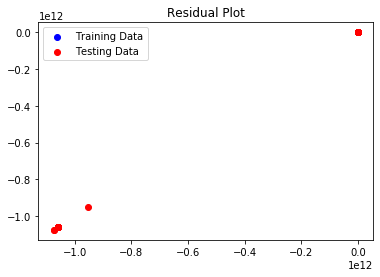

In [26]:
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [27]:
# make prediction 
predictions = model.predict(X_test)

# comparing MSE and R2
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 3.287944408419665e+22, R2: -2.1325163069260848e+21


A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1. R2 Score is the default scoring for many of the Sklearn models

In [28]:
# make dataframe to compare prediction and actual data
pd.DataFrame({"Prediction": predictions.flatten(), "Actual": y_test.flatten()})

,Prediction,Actual
0,2.640625,3
1,8.039062,6
2,8.085938,4
3,6.054688,23
4,3.664062,5
...,...,...
468,4.773438,5
469,6.257812,5
470,5.960938,6
471,4.304688,5
